In [170]:
#Detect and handle outliers for the “median_house_value” field

import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('/Users/engr/Downloads/housing_dataset.csv')

data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [171]:
#Apply the whiskers approach to identify outlier rows
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['median_house_value'] < lower_bound) | (data['median_house_value'] > upper_bound)]
data = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19568,-118.37,33.81,33.0,5057.0,790.0,2021.0,748.0,6.8553,482200.0,NEAR OCEAN
19569,-117.19,32.69,35.0,2921.0,438.0,1042.0,415.0,6.3612,482700.0,NEAR OCEAN
19570,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0,<1H OCEAN
19571,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0,<1H OCEAN
19572,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [172]:
#Apply Z-score normalization and choose appropriate threshold to match the outliers from the whiskers approach
z_scores = zscore(data['median_house_value'])
outliers_z = (np.abs(z_scores) > 3)
data_z = data[~outliers_z]

print(z_scores)
print(outliers_z)
data_z

0       -1.848755
1       -1.848755
2       -1.848755
3       -1.848755
4       -1.822525
           ...   
19563    3.036454
19564    3.036454
19565    3.041698
19566    3.043795
19567    3.043795
Name: median_house_value, Length: 19488, dtype: float64
0        False
1        False
2        False
3        False
4        False
         ...  
19563     True
19564     True
19565     True
19566     True
19567     True
Name: median_house_value, Length: 19488, dtype: bool


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19547,-117.81,33.83,8.0,7326.0,884.0,2569.0,798.0,10.1570,477100.0,<1H OCEAN
19548,-118.51,34.23,36.0,3324.0,448.0,1190.0,423.0,7.2772,477200.0,<1H OCEAN
19549,-118.43,34.05,24.0,3832.0,949.0,1613.0,893.0,3.9673,477300.0,<1H OCEAN
19550,-118.17,34.10,25.0,4444.0,647.0,1922.0,652.0,8.0580,477300.0,<1H OCEAN


In [173]:
#Handle missing values in the dataset

#For numerical features, impute missing values with median, excluding non-numeric columns
numerical_columns = data.select_dtypes(include=['number']).columns
data.loc[:, numerical_columns] = data.loc[:, numerical_columns].fillna(data[numerical_columns].median())

#For categorical features, impute missing values with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data.loc[:, categorical_columns] = data.loc[:, categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19563,-117.68,33.51,19.0,2930.0,428.0,1481.0,430.0,6.3230,480800.0,<1H OCEAN
19564,-122.32,37.52,17.0,6645.0,1034.0,2557.0,1032.0,6.3892,480800.0,NEAR OCEAN
19565,-118.15,33.84,29.0,2448.0,354.0,894.0,349.0,7.6526,481300.0,<1H OCEAN
19566,-118.40,33.89,36.0,2334.0,430.0,1033.0,407.0,6.6321,481500.0,<1H OCEAN


In [174]:
#Investigate the existence of errors/inconsistencies in the fields and solve them
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [175]:
#Investigate the existence of errors/inconsistencies in the fields and solve them
data.loc[:, 'longitude'] = data['longitude'].apply(lambda x: round(x, 2))
data.loc[:, 'latitude'] = data['latitude'].apply(lambda x: round(x, 2))
data.loc[:, 'housing_median_age'] = data['housing_median_age'].apply(lambda x: 100 if x > 100 else x)
data.loc[:, 'total_rooms'] = data['total_rooms'].apply(lambda x: abs(x))
data.loc[:, 'total_bedrooms'] = data['total_bedrooms'].apply(lambda x: 0 if pd.isnull(x) or x < 0 else x)
data.loc[:, 'population'] = data['population'].apply(lambda x: abs(x))
data.loc[:, 'households'] = data['households'].apply(lambda x: abs(x))
data.loc[:, 'median_income'] = data['median_income'].apply(lambda x: 15 if x > 15 else x)
data.loc[:, 'median_house_value'] = data['median_house_value'].apply(lambda x: 500000 if x > 500000 else x)

data.loc[:, 'ocean_proximity'] = data['ocean_proximity'].str.upper()
data.loc[data['ocean_proximity'] == 'NEAR_BAY', 'ocean_proximity'] = 'NEAR BAY'
data.loc[data['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 'INLAND'

data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19563,-117.68,33.51,19.0,2930.0,428.0,1481.0,430.0,6.3230,480800.0,<1H OCEAN
19564,-122.32,37.52,17.0,6645.0,1034.0,2557.0,1032.0,6.3892,480800.0,NEAR OCEAN
19565,-118.15,33.84,29.0,2448.0,354.0,894.0,349.0,7.6526,481300.0,<1H OCEAN
19566,-118.40,33.89,36.0,2334.0,430.0,1033.0,407.0,6.6321,481500.0,<1H OCEAN


In [176]:
#Engineer a new feature by dividing 'total_rooms' by 'households' and rounding to the nearest whole number
data.loc[:, 'rooms_per_household'] = (data['total_rooms'] / data['households'])
data

/var/folders/3d/jnth6mtj36qd963m58t8412w0000gn/T/ipykernel_30858/2944031009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'rooms_per_household'] = (data['total_rooms'] / data['households'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND,6.710526
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,3.774390
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND,3.568889
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,12.250000
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN,3.572464
...,...,...,...,...,...,...,...,...,...,...,...
19563,-117.68,33.51,19.0,2930.0,428.0,1481.0,430.0,6.3230,480800.0,<1H OCEAN,6.813953
19564,-122.32,37.52,17.0,6645.0,1034.0,2557.0,1032.0,6.3892,480800.0,NEAR OCEAN,6.438953
19565,-118.15,33.84,29.0,2448.0,354.0,894.0,349.0,7.6526,481300.0,<1H OCEAN,7.014327
19566,-118.40,33.89,36.0,2334.0,430.0,1033.0,407.0,6.6321,481500.0,<1H OCEAN,5.734644


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

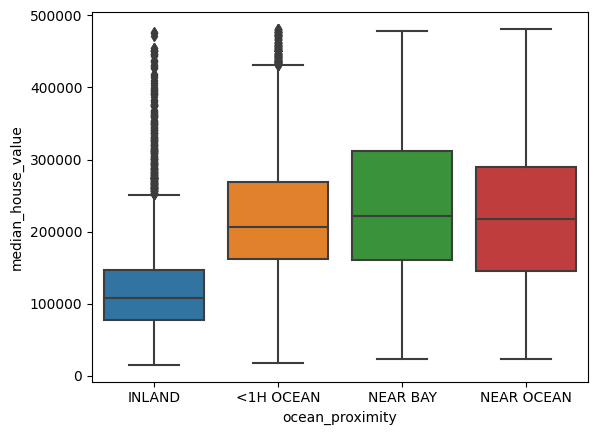

In [177]:
#Investigate the distribution of housing prices across different ocean proximities in California

import seaborn as sns
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)

<Axes: xlabel='median_income', ylabel='median_house_value'>

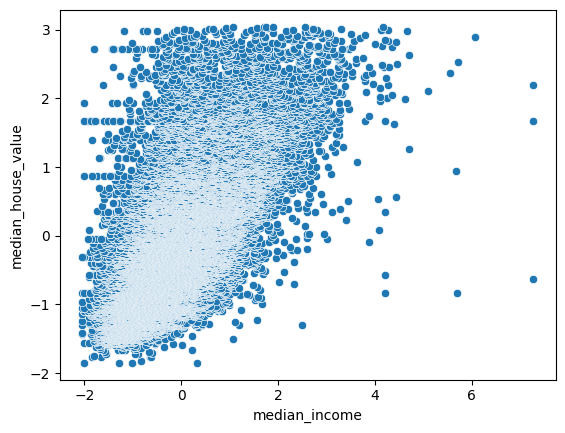

In [180]:
#Analyze the relationship between median income and housing prices

sns.scatterplot(x='median_income', y='median_house_value', data=data)

In [178]:
#Normalize numerical features using appropriate method

from sklearn.preprocessing import StandardScaler

numerical_features = data.select_dtypes(include=['number']).columns

standard_scaler = StandardScaler()

data.loc[:, numerical_features] = standard_scaler.fit_transform(data.loc[:, numerical_features])

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-1.590393,1.892035,-0.986664,-1.083507,-1.107388,-1.185931,-1.209012,-1.291446,-1.848755,INLAND,0.587364
1,1.267413,0.350168,-0.746563,-0.916977,-0.713075,-0.832583,-0.880603,-1.009321,-1.848755,INLAND,-0.689784
2,0.847735,-0.656006,1.894552,-0.832797,-0.646564,-0.712183,-0.721611,0.334962,-1.848755,INLAND,-0.779172
3,-1.805228,2.171528,0.614011,-1.155335,-1.214281,-1.244386,-1.287204,-2.013745,-1.848755,INLAND,2.996901
4,0.612915,-0.697930,0.854113,-0.974622,-0.881727,-1.034123,-0.948370,-0.838043,-1.822525,<1H OCEAN,-0.777617
...,...,...,...,...,...,...,...,...,...,...,...
19563,0.937666,-0.996055,-0.746563,0.140307,-0.264128,0.032029,-0.187295,1.702750,3.036454,<1H OCEAN,0.632352
19564,-1.380554,0.871887,-0.906631,1.839921,1.175354,0.970800,1.381770,1.745265,3.036454,NEAR OCEAN,0.469236
19565,0.702846,-0.842334,0.053775,-0.080209,-0.439906,-0.480108,-0.398415,2.556638,3.041698,<1H OCEAN,0.719510
19566,0.577942,-0.819043,0.614011,-0.132364,-0.259377,-0.358835,-0.247243,1.901258,3.043795,<1H OCEAN,0.162879


In [181]:
#Encode categorical variables using using appropriate method

data = pd.get_dummies(data, columns=['ocean_proximity'])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.590393,1.892035,-0.986664,-1.083507,-1.107388,-1.185931,-1.209012,-1.291446,-1.848755,0.587364,False,True,False,False
1,1.267413,0.350168,-0.746563,-0.916977,-0.713075,-0.832583,-0.880603,-1.009321,-1.848755,-0.689784,False,True,False,False
2,0.847735,-0.656006,1.894552,-0.832797,-0.646564,-0.712183,-0.721611,0.334962,-1.848755,-0.779172,False,True,False,False
3,-1.805228,2.171528,0.614011,-1.155335,-1.214281,-1.244386,-1.287204,-2.013745,-1.848755,2.996901,False,True,False,False
4,0.612915,-0.697930,0.854113,-0.974622,-0.881727,-1.034123,-0.948370,-0.838043,-1.822525,-0.777617,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19563,0.937666,-0.996055,-0.746563,0.140307,-0.264128,0.032029,-0.187295,1.702750,3.036454,0.632352,True,False,False,False
19564,-1.380554,0.871887,-0.906631,1.839921,1.175354,0.970800,1.381770,1.745265,3.036454,0.469236,False,False,False,True
19565,0.702846,-0.842334,0.053775,-0.080209,-0.439906,-0.480108,-0.398415,2.556638,3.041698,0.719510,True,False,False,False
19566,0.577942,-0.819043,0.614011,-0.132364,-0.259377,-0.358835,-0.247243,1.901258,3.043795,0.162879,True,False,False,False


In [182]:
#Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing)
#Train a linear regression model as a baseline model
#Print the learned coefficients (weights) of the model
#Comment on which feature the model gave higher weight to in the weight vector
#Evaluate the model's performance on the test set using the following metrics: MAE and MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

display(model)

print("Coefficients: \n ", model.coef_)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)
print("Mean Squared Error:", mse)




LinearRegression()

Coefficients: 
  [-0.53279167 -0.52692735  0.11039392 -0.15141429  0.23968731 -0.35825991
  0.32619317  0.59482957  0.03603578  0.10495972 -0.30197413  0.04404909
  0.15296532]

Mean Absolute Error: 0.4488299022735176
Mean Squared Error: 0.3681207243155873


The feature with the highest absolute weight (coefficient) is 'median_income' with a coefficient of approximately 0.5948. This suggests that the model gives the highest importance to the median income of households when predicting the median house value. A higher median income is associated with a higher predicted median house value according to this model.

It's important to note that the magnitude of the coefficients reflects the influence of each feature on the predicted outcome. In this case, 'median_income' has the highest magnitude, indicating its significant impact on the model's predictions.

The regression model predicts median house values with an average error of approximately 0.449 (MAE) and squared errors averaging around 0.368 (MSE). The model prioritizes median income as the most influential feature, emphasizing its role in price predictions.

In [183]:
#Try 2 other regression algorithms and compare their performance to the linear regression baseline
#Provide a reasonable explanation on why the results are different between the linear regression model and the other models

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

display(rf_model)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

display(gb_model)

# Predictions using Random Forest Regressor
rf_predictions = rf_model.predict(X_test)

# Calculate MAE and MSE for Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("Random Forest Regressor:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")

# Predictions using Gradient Boosting Regressor
gb_predictions = gb_model.predict(X_test)

# Calculate MAE and MSE for Gradient Boosting Regressor
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print("\nGradient Boosting Regressor:")
print(f"MAE: {gb_mae}")
print(f"MSE: {gb_mse}")

RandomForestRegressor()

GradientBoostingRegressor()

Random Forest Regressor:
MAE: 0.3088733053812982
MSE: 0.20573159181087683

Gradient Boosting Regressor:
MAE: 0.3657487384147055
MSE: 0.26092054184264935


The Random Forest Regressor and Gradient Boosting Regressor outperform the Linear Regressor in predicting housing prices. Both alternative models exhibit lower Mean Absolute Error (MAE) and Mean Squared Error (MSE) compared to the Linear Regressor. Random Forest, by leveraging multiple decision trees and their collective predictions, captures complex data relationships, achieving a more accurate prediction. Gradient Boosting, building sequential trees to correct previous errors, excels in handling intricate patterns in the data. These models' flexibility enables them to outshine the Linear Regressor, which assumes linear relationships and struggles with the dataset's complexity.

The differences in performance arise from the algorithms' complexity. Random Forest and Gradient Boosting, employing ensemble learning with multiple decision trees, can capture intricate, non-linear patterns in the data. In contrast, Linear Regression assumes a linear relationship, making it less adept at handling complex, non-linear data. Random Forest, by combining diverse tree predictions, excels in accuracy, while Gradient Boosting's sequential learning approach refines predictions incrementally. These techniques enable the alternative models to outperform Linear Regression in capturing the complexities of the dataset, resulting in superior predictive accuracy.